Fraudre banca por internet - 
Analisis exploratorio

In [74]:
# basics
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df =  pd.read_csv('C:/dataset.csv', sep=';')
print("El set de datos Tiene",df.shape[0], "filas  y", df.shape[1], "columnas")

Full dataset has 567248 rows and 15 columns


In [76]:
df.head()

,id,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,V11,V12,V13,V14
0,0,0,-2867616628545999257,50,0,1,65,0,0,1,0.0,27200.0,4,203303,1664569983
1,1,0,-6504840883504582007,40,0,0,65,0,0,1,0.0,5400.0,5,151952,1664637592
2,2,0,4174909855240282978,40,0,0,65,0,0,1,0.0,500.0,5,181010,1664647810
3,3,0,-2013252843648584020,50,0,0,65,0,0,1,0.0,1600.0,2,120422,1664366662
4,4,0,2027168926147036699,50,0,0,65,0,0,1,0.0,3000.0,2,123903,1664973543


In [77]:
df.describe()

,id,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,V11,V12,V13,V14
count,567248.000000,567248.000000,5.672480e+05,567248.000000,567248.000000,567248.000000,567248.000000,567248.000000,567248.000000,567248.000000,567248.000000,5.672480e+05,567248.000000,567248.000000,5.672480e+05
mean,283623.500000,0.001119,-6.360981e+15,45.935675,0.001179,0.456795,823.586089,1.953430,0.472289,0.029590,0.030551,1.512168e+05,2.209103,136733.767202,1.664699e+09
std,163750.537085,0.033439,5.323389e+18,4.911675,0.034322,0.498130,604.142545,1.937092,0.499232,0.169454,0.172098,2.305320e+06,1.635027,40771.095560,2.076619e+05
min,0.000000,0.000000,-9.223372e+18,40.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,0.000000,1.664323e+09
25%,141811.750000,0.000000,-4.618072e+18,40.000000,0.000000,0.000000,289.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,1.000000,105458.000000,1.664529e+09
50%,283623.500000,0.000000,-4.727541e+15,50.000000,0.000000,0.000000,749.000000,1.000000,0.000000,0.000000,0.000000,1.639781e+04,2.000000,132600.000000,1.664786e+09
75%,425435.250000,0.000000,4.606183e+18,50.000000,0.000000,1.000000,1329.000000,4.000000,1.000000,0.000000,0.000000,5.477500e+04,4.000000,162927.000000,1.664888e+09
max,567247.000000,1.000000,9.223338e+18,50.000000,1.000000,1.000000,2001.000000,9.000000,1.000000,1.000000,1.000000,1.067000e+09,6.000000,235959.000000,1.664987e+09


In [78]:
print("Cantidad de datos nulos: ", df.isnull().sum().sum())

Cantidad de datos nulos:  0


Analiza si la variable a precedir está balanceada

genuinas: 566613  ( 99.89 % del set de datos)
Fraudulentas: 635  ( 0.11 % del  set de datos)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribución de la variable a precedir \n (0: Normales || 1: Fraude)')

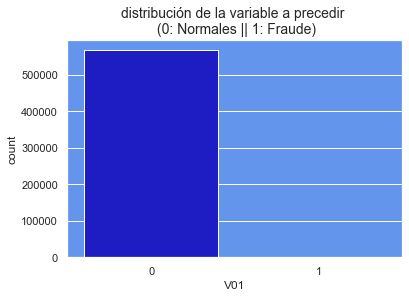

In [79]:
print('genuinas:', round(df['V01'].value_counts()[0]),' (', round(df['V01'].value_counts()[0]/len(df) * 100,2), '% del set de datos)')
print('Fraudulentas:', round(df['V01'].value_counts()[1]),' (', round(df['V01'].value_counts()[1]/len(df) * 100,2), '% del  set de datos)')

colors = ["#0101DF", "#DF0101"]

sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'white'})

sns.countplot('V01', data=df, palette=colors)
plt.title('distribución de la variable a precedir \n (0: Normales || 1: Fraude)', fontsize=14)

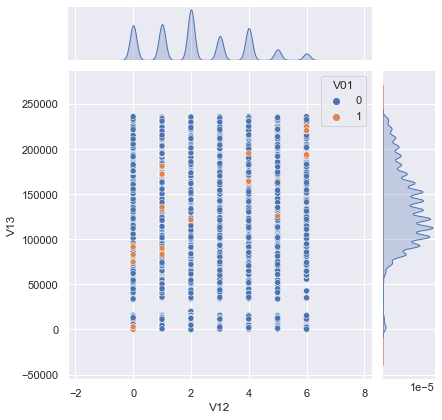

In [80]:
sns.set(rc={'figure.facecolor':'white'})
sns.jointplot(data = df, 
              x = 'V12', # dia de la semana
              y = 'V13', # Hora 
              hue = 'V01')
plt.show()

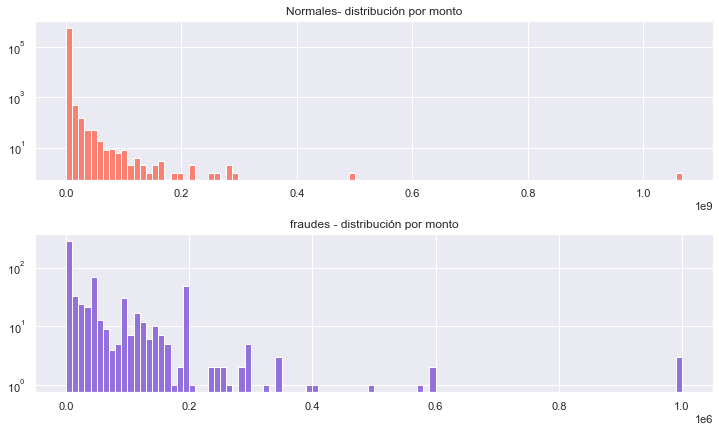

In [81]:
fig, axes = plt.subplots(2,1, figsize=(10,6))
axes[0].hist(df[df['V01'] == 0]['V11'], color='salmon', bins = 100)
axes[1].hist(df[df['V01'] == 1]['V11'], color='mediumpurple', bins=100)
axes[0].set_title('Normales- distribución por monto')
axes[1].set_title('fraudes - distribución por monto')
axes[0].set_yscale('log')
axes[1].set_yscale('log')
fig.tight_layout(pad=0.6)
plt.show()

Text(0.5, 1.0, 'Matriz de correlación de variables')

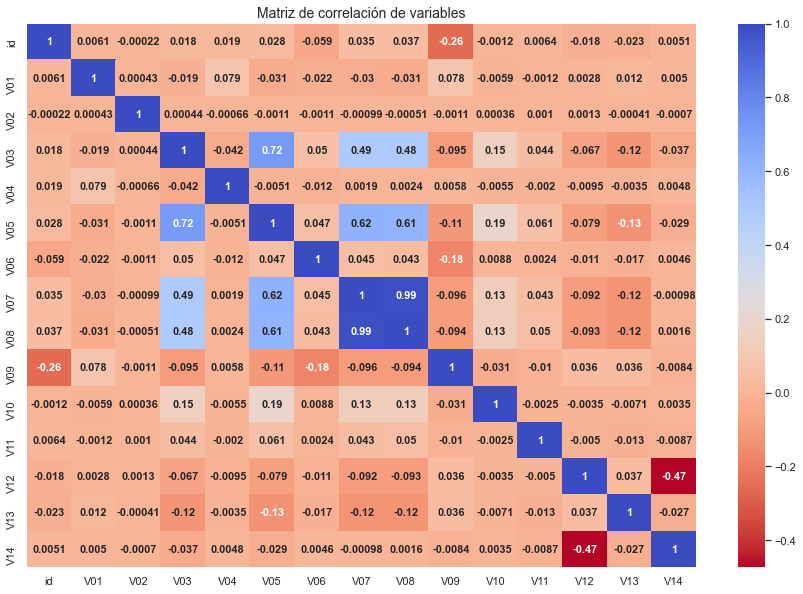

In [82]:
f, ax = plt.subplots(figsize=(15,10)) 
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'} )
ax.set_title("Matriz de correlación de variables", fontsize=14)

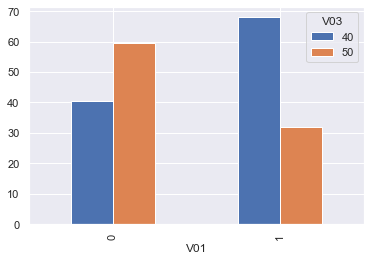

In [83]:
# Gráfico de barras de V1 segun tipo de cuenta origen
plot = pd.crosstab(index=df['V01'],
            columns=df['V03']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

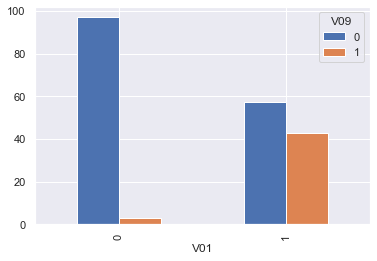

In [84]:
# Gráfico de barras de V1 segun tipo de cuenta destino
plot = pd.crosstab(index=df['V01'],
            columns=df['V09']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
                                              

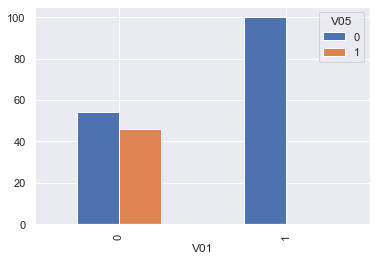

In [85]:
# Gráfico de barras de V1 segun tipo de porsona que originón la operación
plot = pd.crosstab(index=df['V01'],
            columns=df['V05']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')